# About Dataset


## Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

## ID: 
#### ID Number of Customers.
## Warehouse block: 
#### The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
## Mode of shipment:
#### The Company Ships the products in multiple way such as Ship, Flight and Road.
## Customer care calls:
#### The number of calls made from enquiry for enquiry of the shipment.
## Customer rating:
#### The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
## Cost of the product: 
#### Cost of the Product in US Dollars.
## Prior purchases:
#### The Number of Prior Purchase.
## Product importance:
#### The company has categorized the product in the various parameter such as low, medium, high.
## Gender:
#### Male and Female.
## Discount offered:
#### Discount offered on that specific product.
## Weight in gms:
#### It is the weight in grams.
## Reached on time:
#### It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import statsmodels.api as sm # doubt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from xgboost import XGBClassifier

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [2]:
df = pd.read_csv('Train (1).csv')

In [3]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [6]:
df.shape

(10999, 12)

In [7]:
df.size

131988

In [8]:
df.ndim

2

In [9]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [10]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [12]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [13]:

reached_on_time    = df[df['Reached.on.Time_Y.N']==1]
not_reached_on_time = df[df['Reached.on.Time_Y.N']==0]


# EXPLORATRY DATA ANALYSIS

<AxesSubplot: >

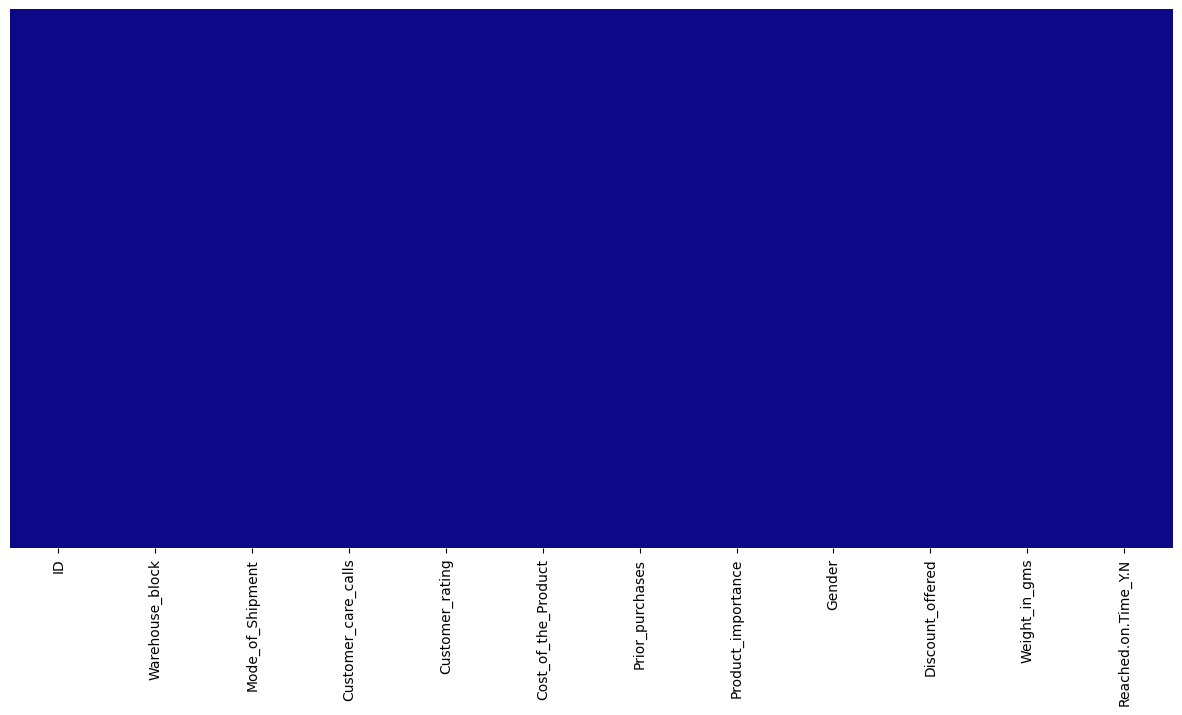

In [14]:
sns.heatmap(df.isnull(), yticklabels= False,cbar = False ,cmap = 'plasma')

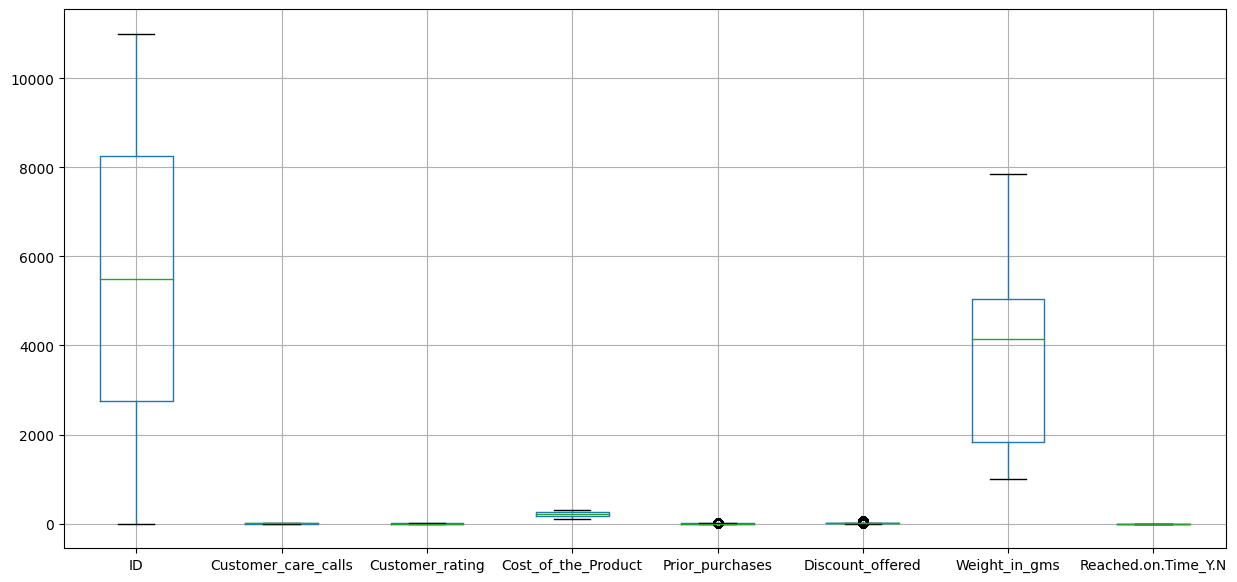

In [15]:
df.boxplot()
plt.show()

In [16]:
df.drop('ID', axis = 1, inplace = True)

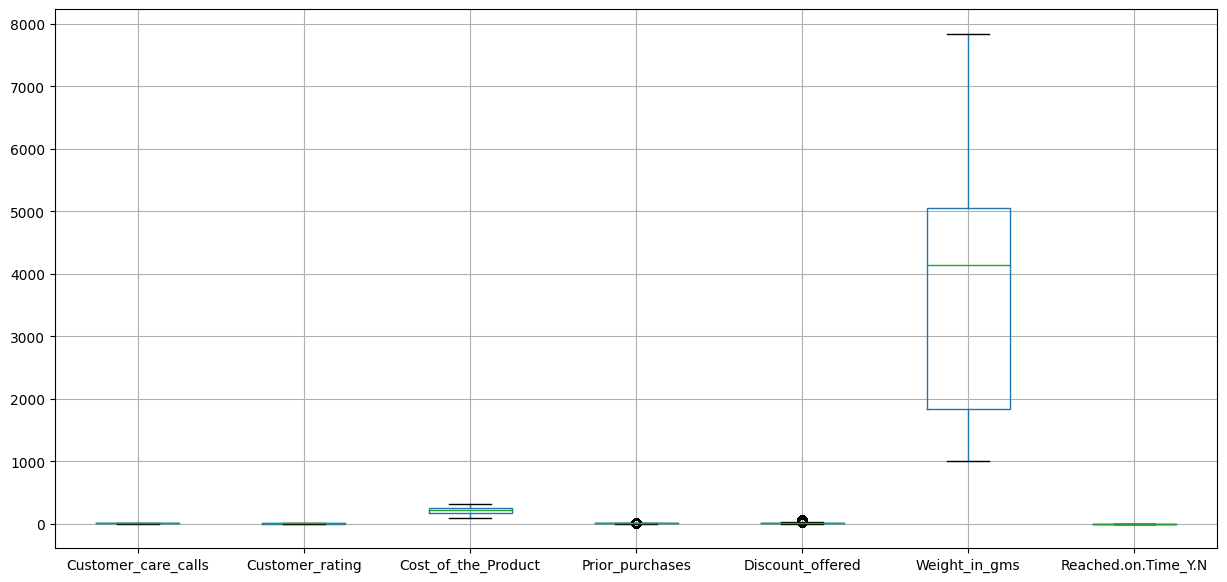

In [17]:
df.boxplot()
plt.show()

<AxesSubplot: >

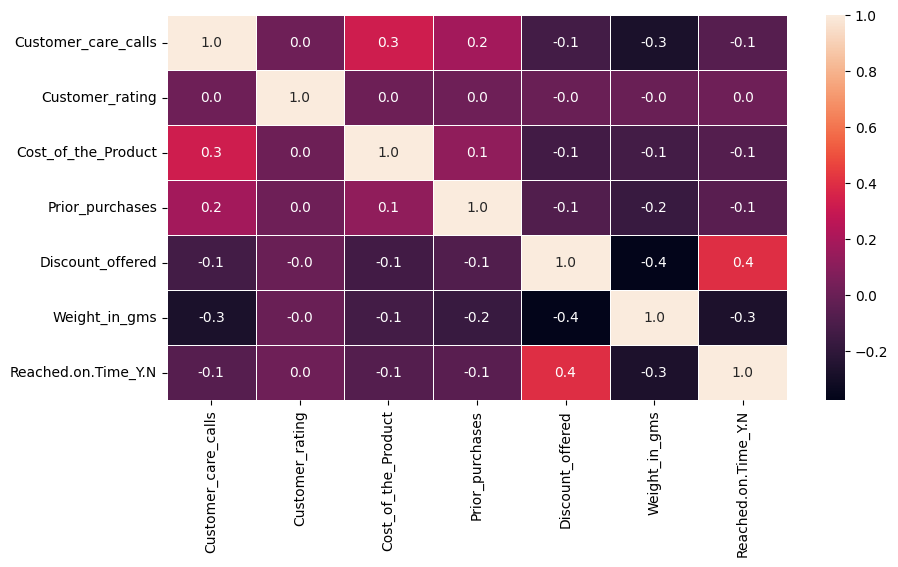

In [18]:
plt.figure(figsize = (10,5))

sns.heatmap(df.corr(), annot= True, linewidths=0.5 ,fmt = ".1f")


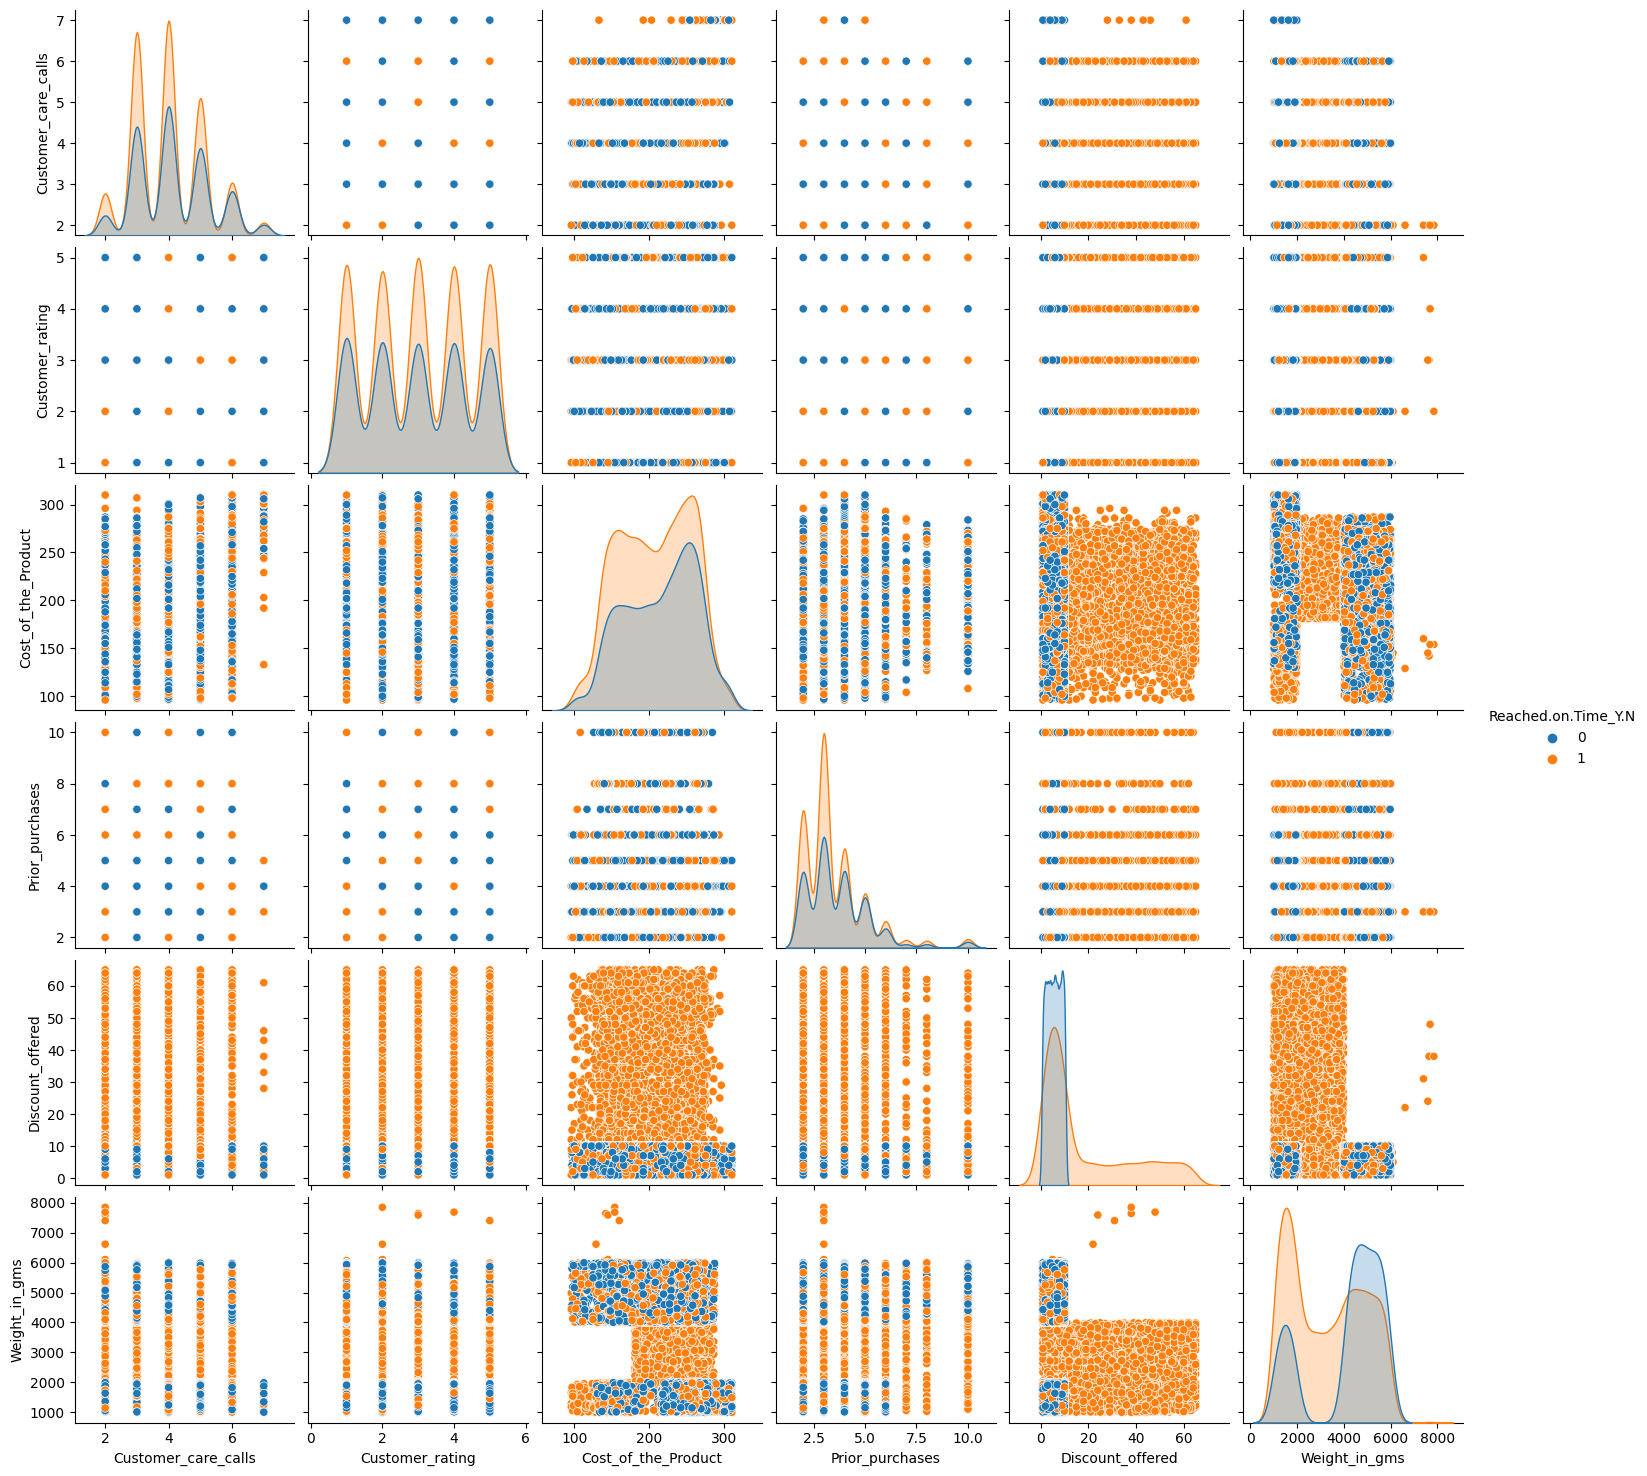

In [19]:
sns.pairplot(df, hue='Reached.on.Time_Y.N')

# Distribution of categorical variables

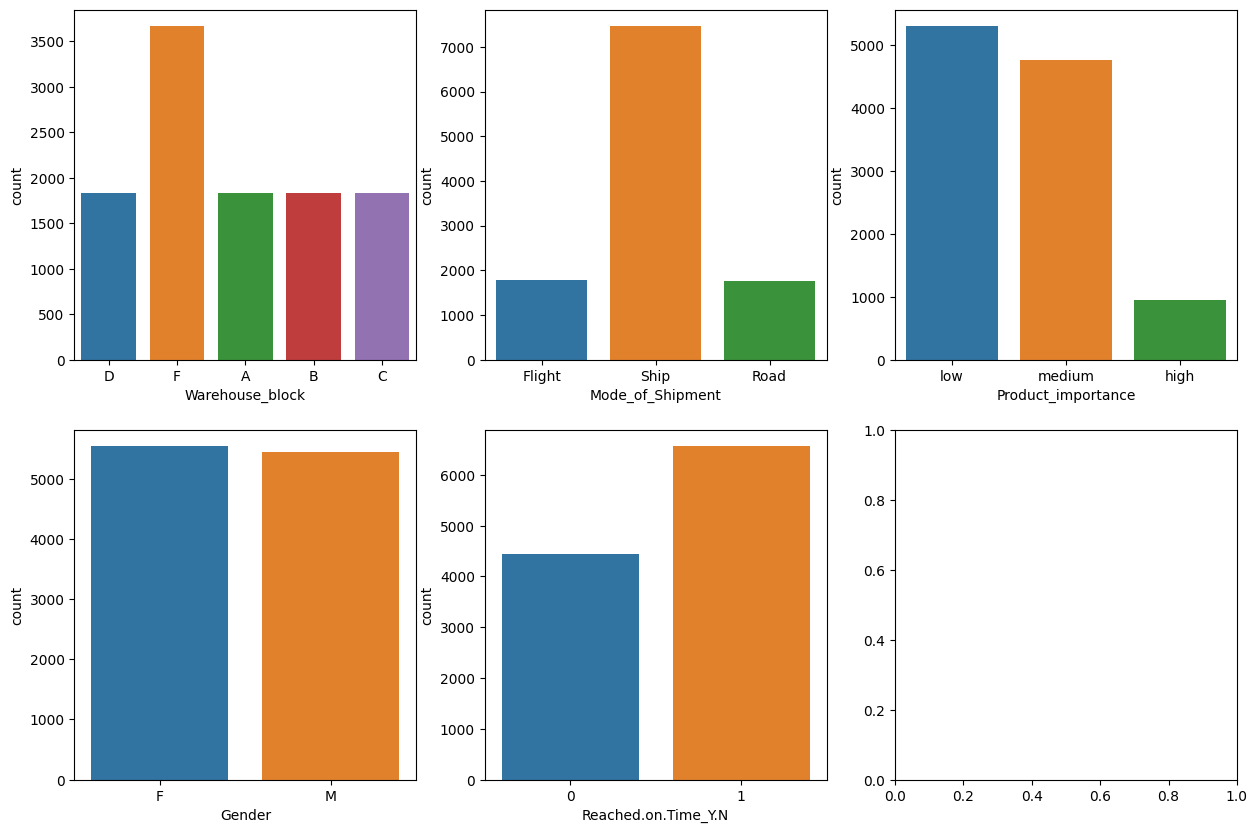

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(data=df, x="Warehouse_block", ax=axs[0][0])
sns.countplot(data=df, x="Mode_of_Shipment", ax=axs[0][1])
sns.countplot(data=df, x="Product_importance", ax=axs[0][2])
sns.countplot(data=df, x="Gender",ax=axs[1][0])
sns.countplot(data=df, x="Reached.on.Time_Y.N", ax=axs[1][1])
plt.show()

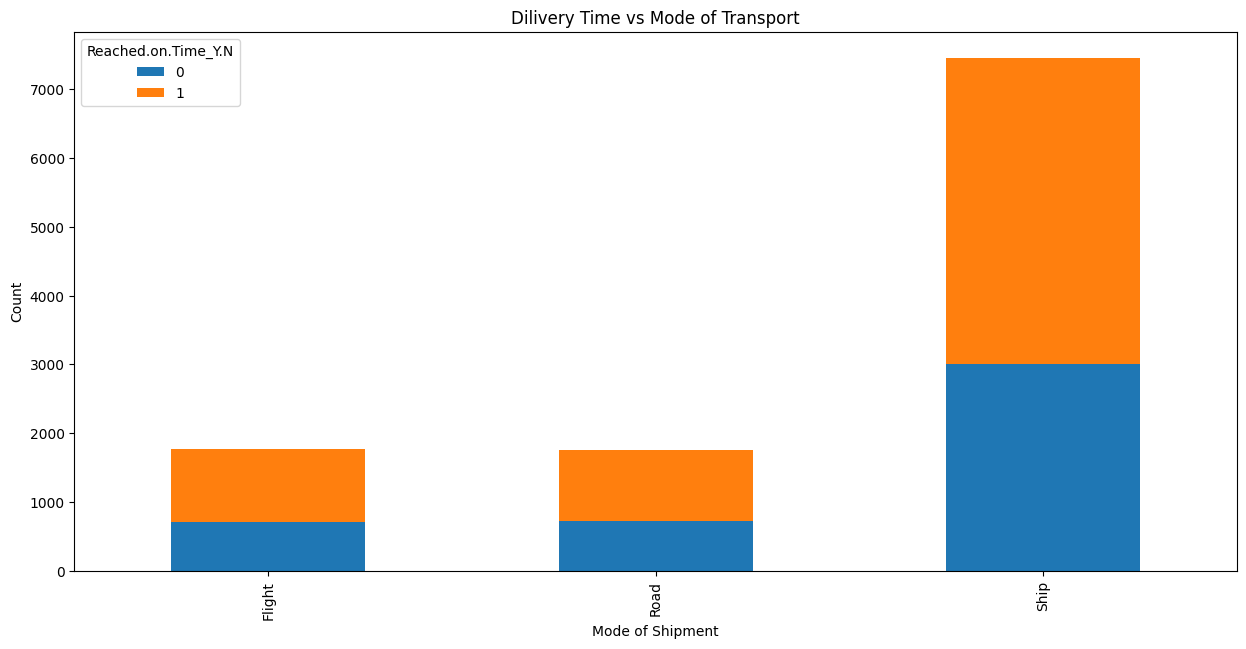

In [21]:
# According to warehouse and the reached on time 
warehouse_reached_time = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
warehouse_reached_time.plot(kind = 'bar', stacked =  True)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Dilivery Time vs Mode of Transport')
plt.show()


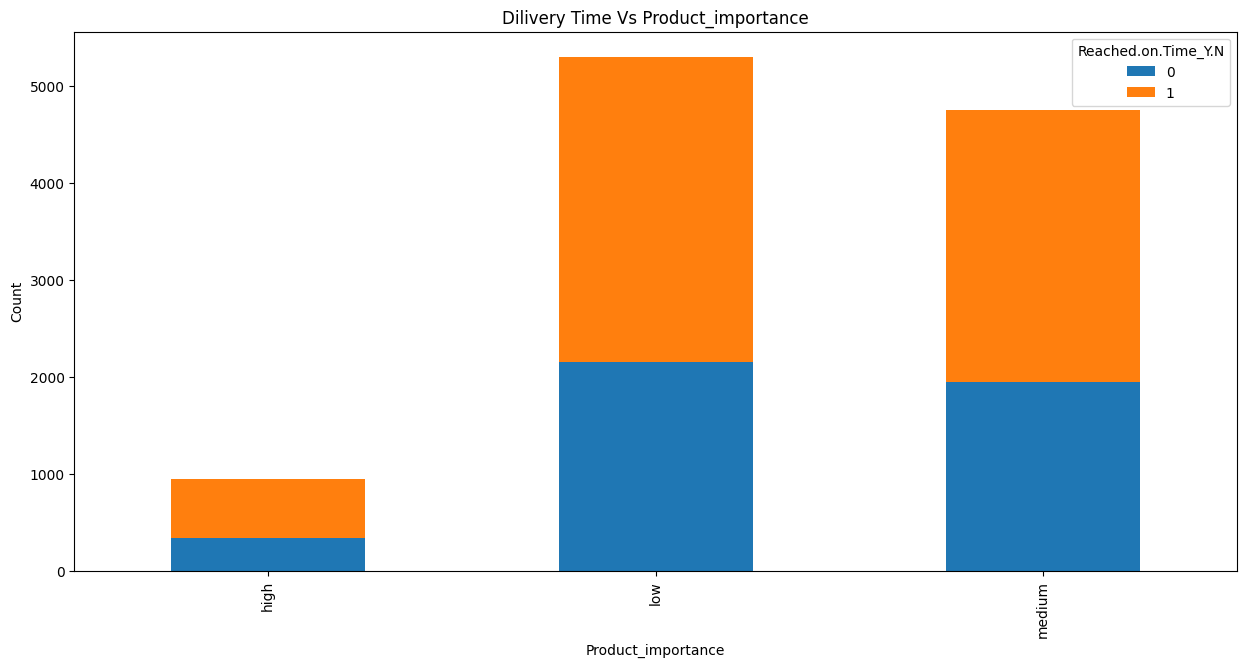

In [22]:
importanct_product_time = df.groupby(['Product_importance', 'Reached.on.Time_Y.N']).size().unstack()
importanct_product_time.plot(kind = 'bar', stacked =  True)
plt.xlabel('Product_importance')
plt.ylabel('Count')
plt.title('Dilivery Time Vs Product_importance')
plt.show()


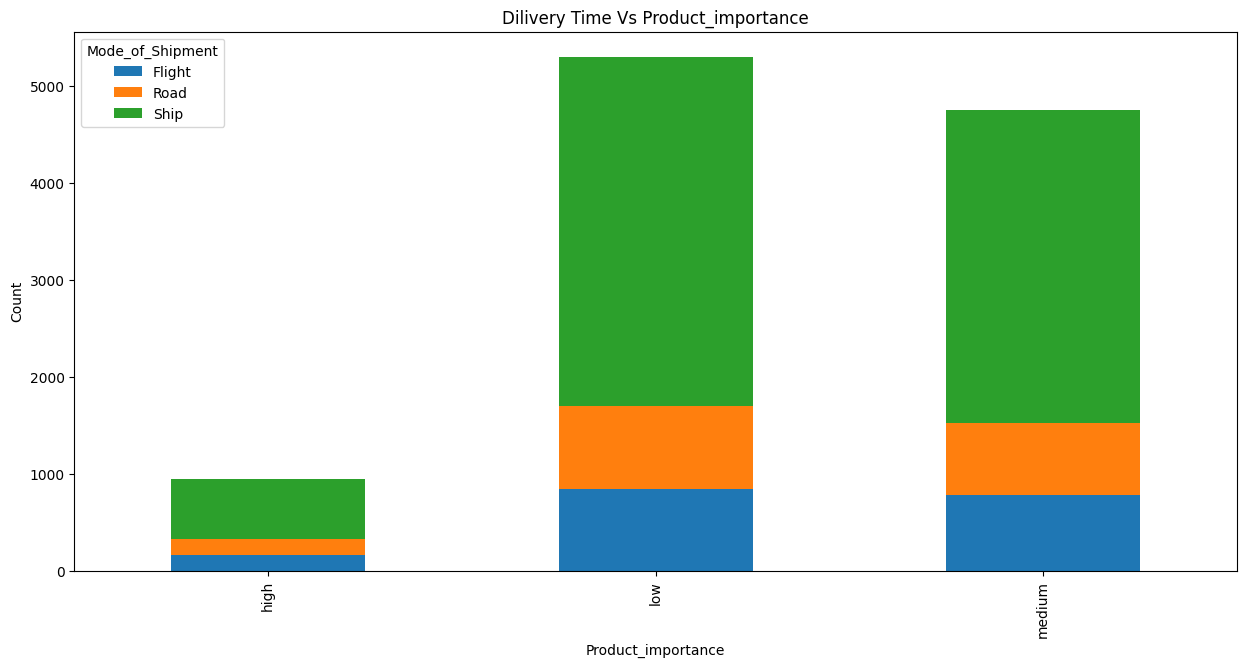

In [23]:
warehouse_reached_time = df.groupby(['Product_importance','Mode_of_Shipment' ]).size().unstack()
warehouse_reached_time.plot(kind = 'bar', stacked =  True)
plt.xlabel('Product_importance')
plt.ylabel('Count')
plt.title('Dilivery Time Vs Product_importance')
plt.show()

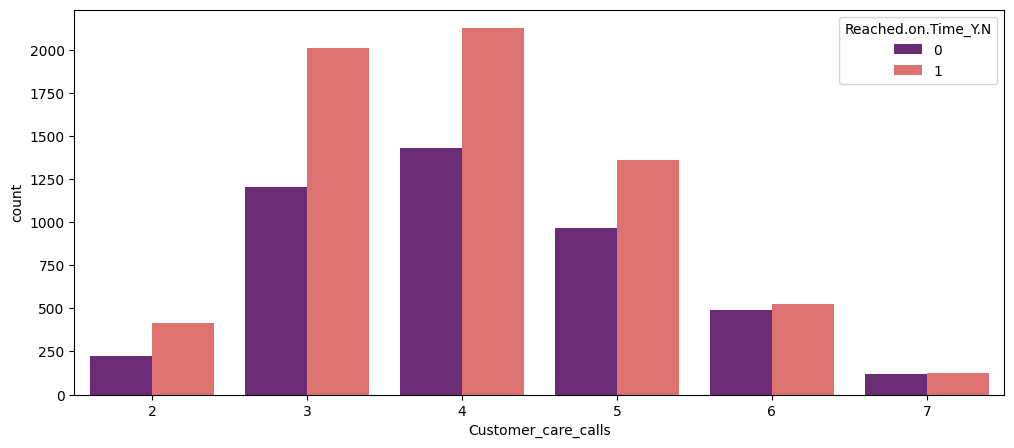

In [24]:
plt.figure(figsize=(12,5))

sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette= 'magma')
plt.show()

Reached.on.Time_Y.N     0     1
Product_importance             
high                  332   616
low                  2157  3140
medium               1947  2807


<AxesSubplot: xlabel='Product_importance'>

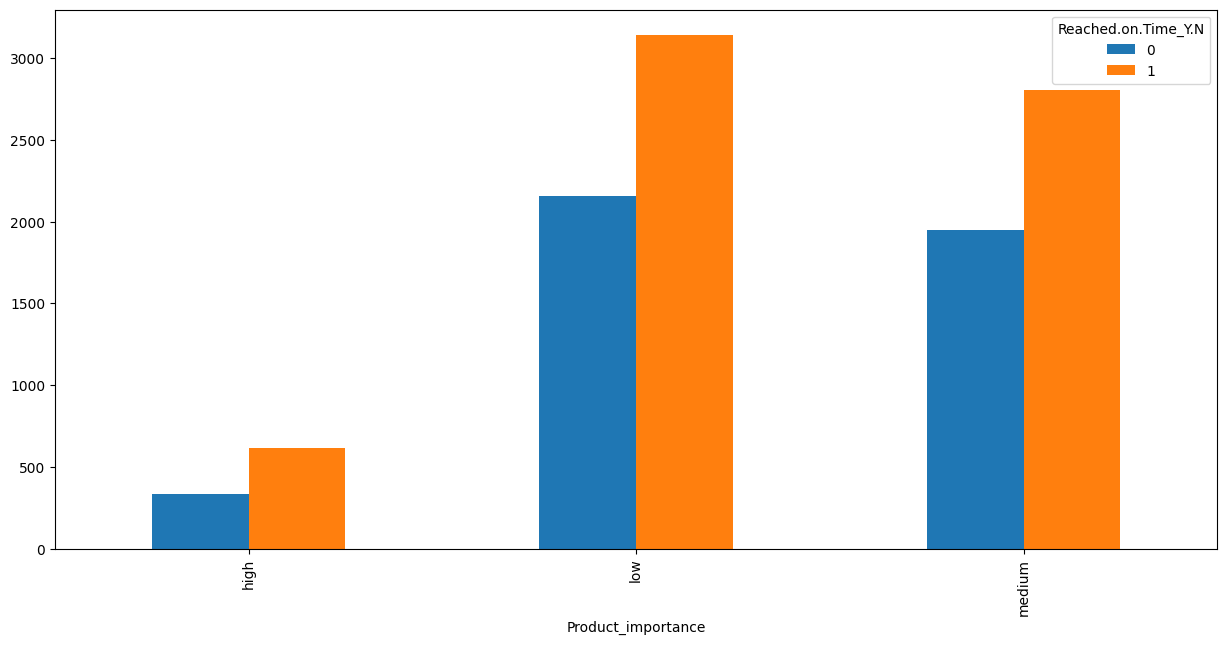

In [25]:
# Create a contingency table
cont_table = pd.crosstab(df["Product_importance"],df['Reached.on.Time_Y.N'])
print(cont_table)
cont_table.plot(kind = 'bar')

# ENCODING AND SCALING 

In [26]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [27]:
a = df.drop(["Reached.on.Time_Y.N",'Gender'], axis = 1)
b = df["Reached.on.Time_Y.N"]

In [28]:
a_categorical = a.select_dtypes(include='object',exclude='int64')

In [29]:
a_categorical.head()

,Warehouse_block,Mode_of_Shipment,Product_importance
0,D,Flight,low
1,F,Flight,low
2,A,Flight,low
3,B,Flight,medium
4,C,Flight,medium


In [30]:
a_categorical = pd.get_dummies(a_categorical, drop_first=True)

In [31]:
a_categorical

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
10994,0,0,0,0,0,1,0,1
10995,1,0,0,0,0,1,0,1
10996,0,1,0,0,0,1,1,0
10997,0,0,0,1,0,1,0,1


# scaling the numerical columns 

In [32]:
a_numerical = a.select_dtypes(include = 'int64', exclude='object')

In [33]:
a_numerical 

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484
...,...,...,...,...,...,...
10994,4,1,252,5,1,1538
10995,4,1,232,5,6,1247
10996,5,4,242,5,4,1155
10997,5,2,223,6,2,1210


In [34]:
stdscaler = StandardScaler()
a_numerical = pd.DataFrame(stdscaler.fit_transform(a_numerical),columns=a_numerical.columns )

In [35]:
a_numerical.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244


In [36]:
x = pd.concat([a_categorical,a_numerical], axis = 1)
x.head()

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0,0,1,0,0,0,1,0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240
1,0,0,0,1,0,0,1,0,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893
2,0,0,0,0,0,0,1,0,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002
3,1,0,0,0,0,0,0,1,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484
4,0,1,0,0,0,0,0,1,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244


In [37]:
y = df['Reached.on.Time_Y.N']

# Observing and defining target variable

In [38]:
print("Total =", len(df))
print("Product reached on time  = ", len(reached_on_time))
print("Percentage  who did reached on time  = ", 1.*len(reached_on_time)/len(df)*100.0, "%")
print("Product did not reached on time  =", len(not_reached_on_time))
print("Percentage who did not reached on time   =", 1.*len(not_reached_on_time)/len(df)*100.0, "%")
 

Total = 10999
Product reached on time  =  6563
Percentage  who did reached on time  =  59.66906082371125 %
Product did not reached on time  = 4436
Percentage who did not reached on time   = 40.33093917628875 %


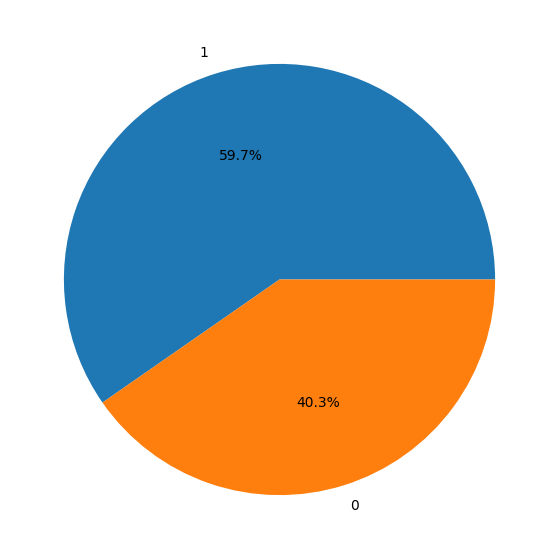

In [39]:
target_variable= df['Reached.on.Time_Y.N'].value_counts()
plt.pie(target_variable.values, labels=target_variable.index, autopct='%1.1f%%')
plt.title('')
plt.show()

# Splitting Data In To Training And Test Set

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
class_weights = class_weight.compute_sample_weight('balanced', y_train)

In [42]:
# bagging :- Random Forest
# Boosting :- AdaBoost,GRADIENTBoost, XGBoost, CATBoost

# Decision-Tree-Classifier  

In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train,sample_weight=class_weights)


DecisionTreeClassifier()

In [44]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [45]:
feature_importances

,importance
Discount_offered,0.344523
Weight_in_gms,0.219944
Cost_of_the_Product,0.161089
Prior_purchases,0.064380
Customer_rating,0.043746
Customer_care_calls,0.040083
Mode_of_Shipment_Ship,0.024855
Warehouse_block_B,0.018305
Warehouse_block_F,0.016577
Product_importance_medium,0.016318


<AxesSubplot: >

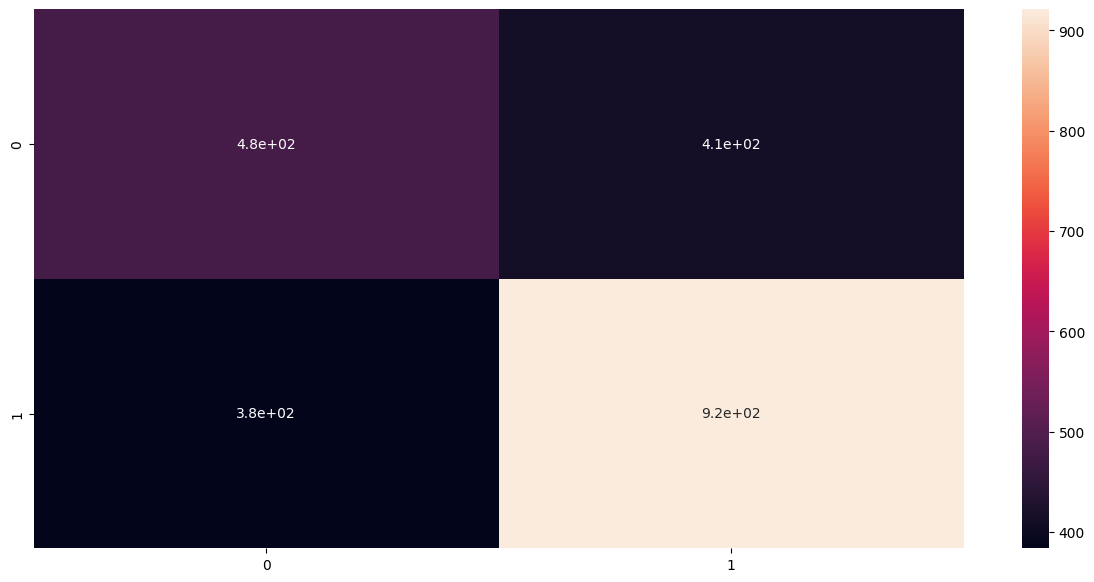

In [46]:
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [47]:
test_acc = accuracy_score(y_test, y_predict_test)
print(test_acc)

0.6377272727272727


In [48]:
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.56      0.54      0.55       895
           1       0.69      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200



# BAGGING TECHNIQUES:- 
## Random Forest 
    

In [49]:
from sklearn.ensemble import  RandomForestClassifier

In [50]:
ran_forest = RandomForestClassifier()

In [51]:
ran_forest.fit(X_train, y_train,sample_weight=class_weights)

RandomForestClassifier()

<AxesSubplot: >

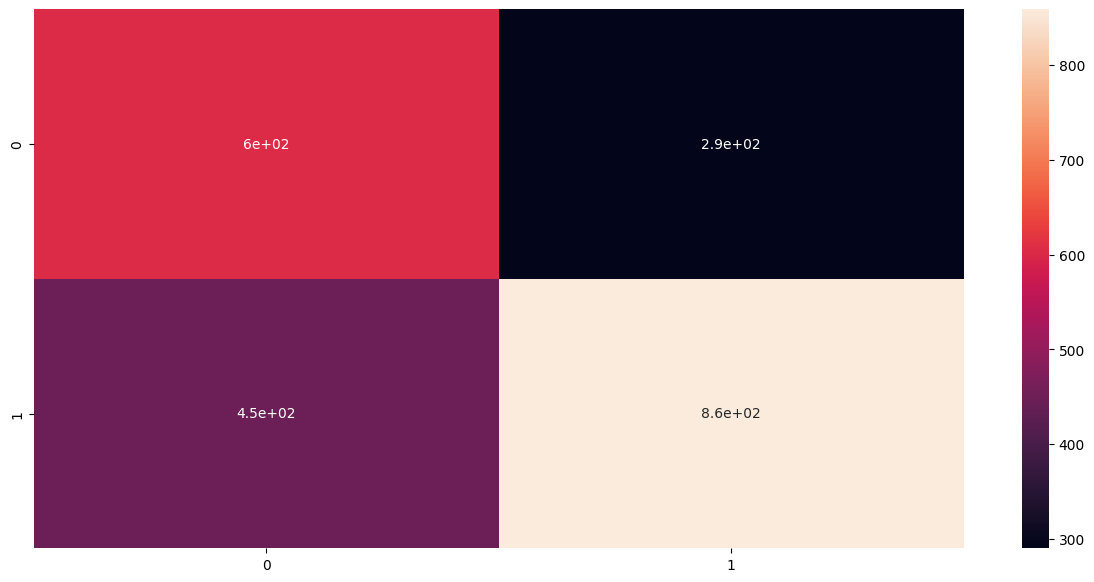

In [52]:
y_predict_test = ran_forest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [53]:
test_acc = accuracy_score(y_test, y_predict_test)
print(test_acc)

0.6654545454545454


In [54]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62       895
           1       0.75      0.66      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



# BOOSTING TECHNIQUES
## Gradient-Boosting-Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc = GradientBoostingClassifier()

In [57]:
gbc.fit(X_train, y_train,sample_weight=class_weights)

GradientBoostingClassifier()

<AxesSubplot: >

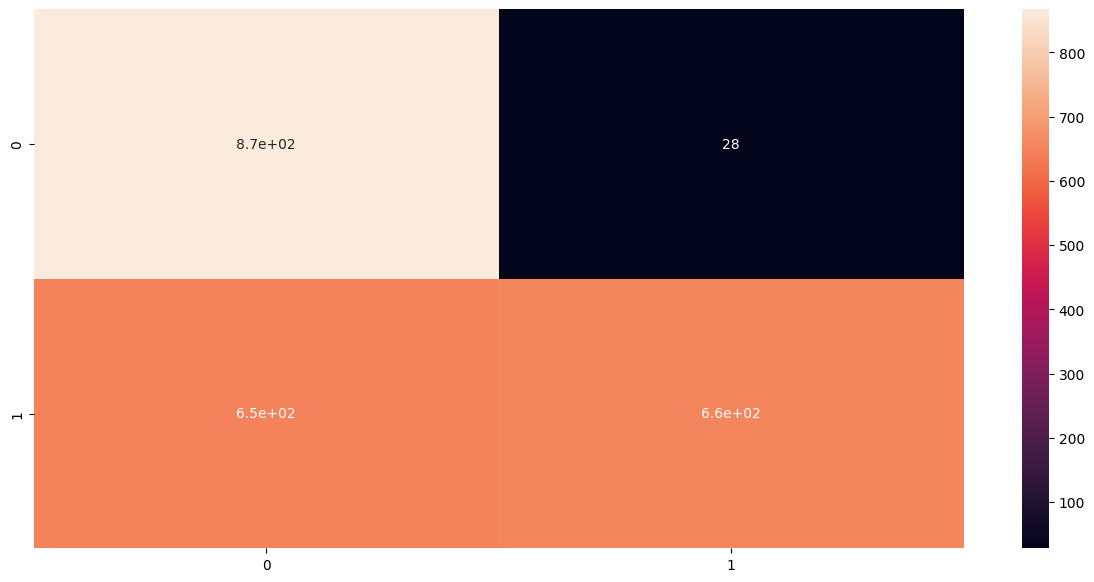

In [58]:
y_predict_test = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [59]:
test_acc = accuracy_score(y_test, y_predict_test)
print(test_acc)

0.6927272727272727


In [60]:
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.96      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



## AdaBoostClassifier[Adaptive- Boosting]

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001, 0.001,0.01, 0.1,1.0]
grid['algorithm']=['SAMME', 'SAMME.R']
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs= -1,cv=10,scoring='accuracy')

# Execute the grid search :-
grid_result = grid_search.fit(X_train, y_train, sample_weight=class_weights)

# Summarize the best Score and Configuration :-
print('BEST : %f  USING %s' %(grid_result.best_score_, grid_result.best_params_))

BEST : 0.681781  USING {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 10}


In [63]:
# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best model to predict on the test set
y_pred = grid_search.predict(X_test)

# Print the accuracy score on the test set
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 10}
Best Score:  0.6817814665425587
Accuracy:  0.6859090909090909


In [64]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.96      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



# Extreme Gradient Boosting-[Xg-Boost]

In [65]:
from xgboost import XGBClassifier

In [66]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5,6],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.8, 0.9, 1]
}

In [67]:
xg_classifier = XGBClassifier()

#xg_classfier.fit(X_train,y_train)

In [68]:
grid_search = GridSearchCV(estimator = xg_classifier , param_grid=param_grid, cv=5,)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

Accuracy:  0.6859090909090909


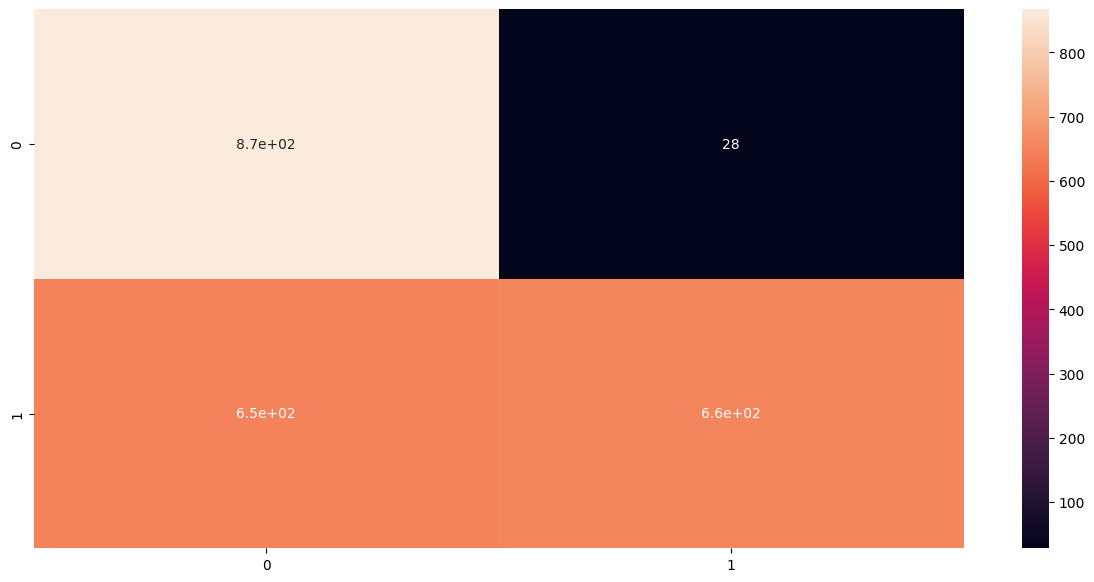

In [71]:
y_pred_test = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
# Print the accuracy score on the test set
print("Accuracy: ", accuracy_score(y_test, y_pred))

In [73]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.94      0.71       895
           1       0.93      0.52      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.78      0.69      0.68      2200

